## 1. Modeling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [6]:
train = pd.read_csv(r'./titanic/train_set.csv')
test = pd.read_csv(r'./titanic/test_set.csv')

In [7]:
train.head()

,Survived,Pclass,Age_Category,Fare_Category,FamilyMembers,female,male,C,Q,S,Master,Miss,Mr,Mrs,Rare
0,0,3,1.0,0,2,0,1,0,0,1,0,0,1,0,0
1,1,3,1.0,1,1,1,0,0,0,1,0,1,0,0,0
2,1,1,2.0,4,2,1,0,0,0,1,0,0,0,1,0
3,0,3,2.0,1,1,0,1,0,0,1,0,0,1,0,0
4,0,3,1.0,1,1,0,1,0,1,0,0,0,1,0,0


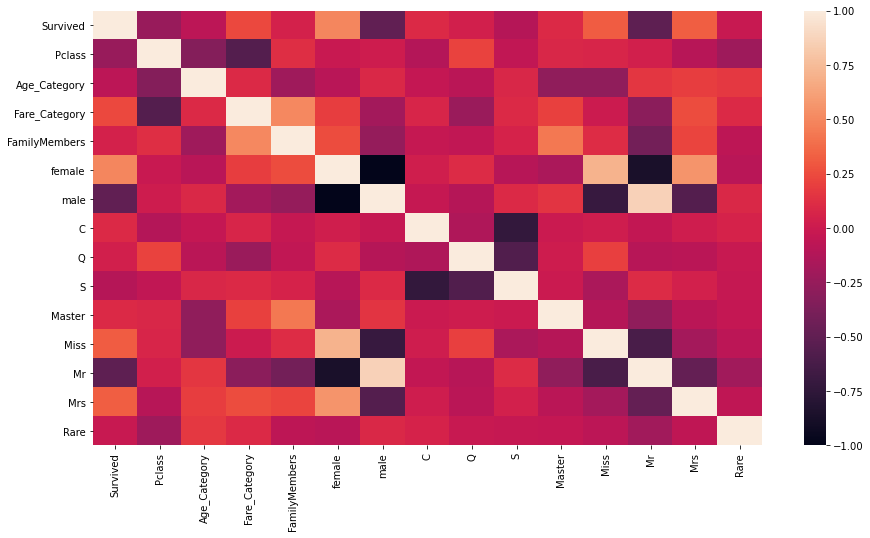

In [9]:
plt.figure(figsize=(15, 8))
sns.heatmap(train.corr())

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [34]:
cols = list(train.columns)[1:]
train_x = train.loc[:,cols]
train_y = train.loc[:,'Survived']

In [37]:
train_x.shape, train_y.shape

((775, 14), (775,))

### 1.1 Data Scaling & Splitting

In [38]:
scaler = StandardScaler()
scaled_train_x = scaler.fit_transform(train_x)

In [39]:
scaled_train_x

array([[ 0.70852824, -0.34474036, -1.41239702, ...,  0.78825054,
        -0.37824311, -0.1542014 ],
       [ 0.70852824, -0.34474036, -0.70437135, ..., -1.26863218,
        -0.37824311, -0.1542014 ],
       [-2.01658037,  0.64847072,  1.41970567, ..., -1.26863218,
         2.64380232, -0.1542014 ],
       ...,
       [ 0.70852824, -0.34474036,  0.71168   , ..., -1.26863218,
        -0.37824311, -0.1542014 ],
       [-2.01658037, -0.34474036,  1.41970567, ...,  0.78825054,
        -0.37824311, -0.1542014 ],
       [ 0.70852824,  0.64847072, -1.41239702, ...,  0.78825054,
        -0.37824311, -0.1542014 ]])

In [42]:
train_set, test_set, train_label, test_label = train_test_split(scaled_train_x, train_y, test_size=0.1, shuffle=True)

In [44]:
train_set.shape, train_label.shape

((697, 14), (697,))

In [45]:
test_set.shape, test_label.shape

((78, 14), (78,))

In [53]:
# Data Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score

### 1.2 Linear Regression

In [54]:
lr_model = LogisticRegression()
lr_model.fit(train_set, train_label)
lr_predictions = lr_model.predict(test_set)

In [67]:
# accuracy, precision & recall for Linear Regreesion
lr_precision = precision_score(test_label, lr_predictions, average='micro')
lr_recall = recall_score(test_label, lr_predictions, average='binary')
lr_accuracy = accuracy_score(test_label, lr_predictions)
print("Linar Regression Precision: ",lr_precision)
print("Linar Regression Recall: ",lr_recall)
print("Linar Regression Accuracy: ",lr_accuracy)

Linar Regression Precision:  0.7564102564102564
Linar Regression Recall:  0.6538461538461539
Linar Regression Accuracy:  0.7564102564102564


### 1.3 Decision Tree

In [62]:
dt_model = DecisionTreeClassifier()
dt_model.fit(train_set, train_label)
dt_predictions = dt_model.predict(test_set)

In [69]:
# accuracy, precision & recall for Decision Tree
dt_precision = precision_score(test_label, dt_predictions, average='micro')
dt_recall = recall_score(test_label, dt_predictions, average='binary')
dt_accuracy = accuracy_score(test_label, dt_predictions)
print("Decision Tree Precision: ",dt_precision)
print("Decision Tree Recall: ",dt_recall)
print("Decision Tree Accuracy: ",dt_accuracy)

Decision Tree Precision:  0.782051282051282
Decision Tree Recall:  0.6153846153846154
Decision Tree Accuracy:  0.782051282051282


### 1.4 Random Forest

In [76]:
rf_model = RandomForestClassifier()
rf_model.fit(train_set, train_label)
rf_predictions = rf_model.predict(test_set)

In [82]:
# accuracy, precision & recall for Random Forest
rf_precision = precision_score(test_label, rf_predictions, average='micro')
rf_recall = recall_score(test_label, rf_predictions, average='binary')
rf_accuracy = accuracy_score(test_label, rf_predictions)
print("Random Forest Precision: ",rf_precision)
print("Random Forest Recall: ",rf_recall)
print("Random Forest Accuracy: ",rf_accuracy)

Random Forest Precision:  0.7948717948717948
Random Forest Recall:  0.6153846153846154
Random Forest Accuracy:  0.7948717948717948


### 1.5 AdaBoost

In [79]:
AdaBoost_model = AdaBoostClassifier()
AdaBoost_model.fit(train_set, train_label)
AdaBoost_predictions = AdaBoost_model.predict(test_set)

In [81]:
# accuracy, precision & recall for AdaBoost
adaBoost_precision = precision_score(test_label, AdaBoost_predictions, average='micro')
adaBoost_recall = recall_score(test_label, AdaBoost_predictions, average='binary')
adaBoost_accuracy = accuracy_score(test_label, AdaBoost_predictions)
print("AdaBoost Precision: ",adaBoost_precision)
print("AdaBoost Recall: ",adaBoost_recall)
print("AdaBoost Accuracy: ",adaBoost_accuracy)

AdaBoost Precision:  0.7692307692307693
AdaBoost Recall:  0.6153846153846154
AdaBoost Accuracy:  0.7692307692307693


### 1.6 Gradient Boosting

In [85]:
GB_model = GradientBoostingClassifier()
GB_model.fit(train_set, train_label)
GB_predictions = GB_model.predict(test_set)

In [86]:
# accuracy, precision & recall for Gradient Boosting
gb_precision = precision_score(test_label, GB_predictions, average='micro')
gb_recall = recall_score(test_label, GB_predictions, average='binary')
gb_accuracy = accuracy_score(test_label, GB_predictions)
print("Gradient Boosting Precision: ",gb_precision)
print("Gradient Boosting Recall: ",gb_recall)
print("Gradient Boosting Accuracy: ",gb_accuracy)

Gradient Boosting Precision:  0.7564102564102564
Gradient Boosting Recall:  0.5769230769230769
Gradient Boosting Accuracy:  0.7564102564102564


### 1.7 Support Vector Machine

In [88]:
svc_model = SVC()
svc_model.fit(train_set, train_label)
svc_predictions = svc_model.predict(test_set)

In [89]:
# accuracy, precision & recall for Support Vector Machine
svc_precision = precision_score(test_label, svc_predictions, average='micro')
svc_recall = recall_score(test_label, svc_predictions, average='binary')
svc_accuracy = accuracy_score(test_label, svc_predictions)
print("Support Vector Machine Precision: ",svc_precision)
print("Support Vector Machine Recall: ",svc_recall)
print("Support Vector Machine Accuracy: ",svc_accuracy)

Support Vector Machine Precision:  0.8076923076923077
Support Vector Machine Recall:  0.6538461538461539
Support Vector Machine Accuracy:  0.8076923076923077


### 1.8 Bagging

In [90]:
bag_model = BaggingClassifier()
bag_model.fit(train_set, train_label)
bag_predictions = bag_model.predict(test_set)

In [91]:
# accuracy, precision & recall for Bagging Classifier
bag_precision = precision_score(test_label, bag_predictions, average='micro')
bag_recall = recall_score(test_label, bag_predictions, average='binary')
bag_accuracy = accuracy_score(test_label, bag_predictions)
print("Bagging Classifier Precision: ",bag_precision)
print("Bagging Classifier Recall: ",bag_recall)
print("Bagging Classifier Accuracy: ",bag_accuracy)

Bagging Classifier Precision:  0.7692307692307693
Bagging Classifier Recall:  0.5769230769230769
Bagging Classifier Accuracy:  0.7692307692307693


<p>Highest Recall achieved so far is 65% by <b>Linear Regression</b> & <b>Support Vector Machine</b>. The reason of not achieving good recall is the imbalance dataset. We will be handling this out in next steps.</p>